# Machine Learning: Session 3

In [2]:
# !pip install graphviz

   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ---------------------------------- ----- 41.0/47.1 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 784.8 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import graphviz
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn import tree
from sklearn import datasets
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)
CRED = '\033[91m'
CEND = '\033[0m'

## Task 1. Different distance measures in KNN (1 point)

The goal of this task is to understand better how different distance measures can affect the KNN performance. In addition, we are going to test the effect of normalizing input features and using weighted averaging for the nearest neighbours.

**(a)** Load the "wine" dataset from sklearn datasets, put input features into pandas dataframe and name the columns with feature names. <br>
Report the number of features and the number of classes in the dataset.

In [11]:
#Load dataset
wine = datasets.load_wine()
#HINTS:
#wine.data contains numpy array of dataset input features
#wine.target contains labels of instances
#wine.feature_names contains features labels

try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    data = pd.DataFrame(wine.data, columns=wine.feature_names)
    data['target'] = wine.target
    display(data.head())
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0

In [13]:
num_features = len(wine.feature_names)
num_classes = len(set(wine.target))
display(num_classes, num_features)

3

13

**<font color='purple'>Answer to (a):</font>** 
- num_features -> 13
- num_classes -> 3

**(b)** Split the dataset into 80% training data and 20% test data using random seed = 22, and report the number of instances in the training set and in the test set.

In [17]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    X = data.drop(columns='target')  
    y = data['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
    num_train_instances = X_train.shape[0]
    num_test_instances = X_test.shape[0]

    print(f"num of train instances: {num_train_instances}, num of test instances: {num_test_instances}")
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

num of train instances: 142, num of test instances: 36


**<font color='purple'>Answer to (b):</font>**

**(c)** Use the KNN Classifier from Sklearn to fit a model for different values of K (3, 5, 7). Report test accuracy for each K. Report the best K to be used on this dataset.

In [26]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    k_values = [3, 5, 7]
    accuracies = {}
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies[k] = accuracy
    display(accuracies)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

{3: 0.6666666666666666, 5: 0.6944444444444444, 7: 0.6666666666666666}

**<font color='purple'>Answer to (c):</font>**

**(d)** Use the best value of K from the previous subtask, and try changing the distance metric used by KNN into euclidean, manhattan, chebyshev and minkowski with P = 3. Report the accuracy obtained with each metric. Report the best metric to be used on this dataset.

In [31]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    ##### YOUR CODE ENDS ##### (please do not delete this line)
    distance_metrics = {
        "euclidean": "euclidean",
        "manhattan": "manhattan",
        "chebyshev": "chebyshev",
        "minkowski": ("minkowski", 3),
    }

    accuracy_by_metric = {}

    # Train and test KNN classifier with different distance metrics
    for metric, metric_value in distance_metrics.items():
        if metric == "minkowski":
            knn = KNeighborsClassifier(
                n_neighbors=5, metric=metric_value[0], p=metric_value[1]
            )
        else:
            knn = KNeighborsClassifier(n_neighbors=5, metric=metric_value)

        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        # Calculate test accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_by_metric[metric] = accuracy

except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)
except Exception as e:
    print("Exception:", e)

In [32]:
print(accuracy_by_metric)

{'euclidean': 0.6944444444444444, 'manhattan': 0.7222222222222222, 'chebyshev': 0.6666666666666666, 'minkowski': 0.6944444444444444}


**<font color='purple'>Answer to (d):</font>**

**(e)** Try to use weights for nearest neighbors according to the inverse of their distance from the test instance. Use the best K found in **(c)** and the best distance metric found in **(d)**. Report the accuracy and discuss whether it is better to use weights or not. (Hint: Read about `weights` parameter from <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html">HERE</a>)

In [33]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    knn_weighted = KNeighborsClassifier(n_neighbors=5, metric='manhattan', weights='distance')
    knn_weighted.fit(X_train, y_train)
    y_pred_weighted = knn_weighted.predict(X_test)
    weighted_accuracy = accuracy_score(y_test, y_pred_weighted)
    print(weighted_accuracy)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

0.8055555555555556


**<font color='purple'>Answer to (e):</font>** when i used distance-based weighting the model accuracy has been improved, this indicates that the distance between neighbors plays an important role in this dataset

**(f)** Standardize the features in the whole dataset by subtracting the mean and dividing by standard deviation from each feature (The mean and standard deviation should be calculated from the training instances only). Predict the accuracy using best parameters found in **(c)**, **(d)**, and **(e)**. Is it better to standardize / normalize your features before using KNN? WHY?

In [34]:
from sklearn.preprocessing import StandardScaler

try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    ##### YOUR CODE ENDS ##### (please do not delete this line)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.fit_transform(X_test)
    knn_standardized = KNeighborsClassifier(n_neighbors=5, metric='manhattan', weights='distance')
    knn_standardized.fit(X_train_scaled, y_train)
    y_pred_standardized = knn_standardized.predict(X_test_scaled)
    standardized_accuracy = accuracy_score(y_test, y_pred_standardized)
    print(standardized_accuracy)
    
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

0.9166666666666666


**<font color='purple'>Answer to (f):</font>** accuracy has been improved, i think this because features have same scales so this leading to better classification performance. 

**(g)** Based on your observations during this task, write out what have you learnt so far when using the KNN learning algorithm.

**<font color='purple'>Answer to (g):</font>**
### Key Learnings:
- Choosing the Right K
- Different distance metrics affect how KNN identifies the nearest neighbors
- Importance of Feature Scaling

## Task 2. Linear and polynomial kernels in SVM (2 points)

The goal of this task is to understand better how the choice of kernel and parameter values affect the performance of SVM. You are given a two-dimensional dataset with a binary label and two features: $x_1$ and $x_2$. Your class labels are generated from the features using the XOR function, such that the class is positive when either $x_1 > 0$ or $x_2 > 0$ but not both. The following code creates this dataset and plots it.

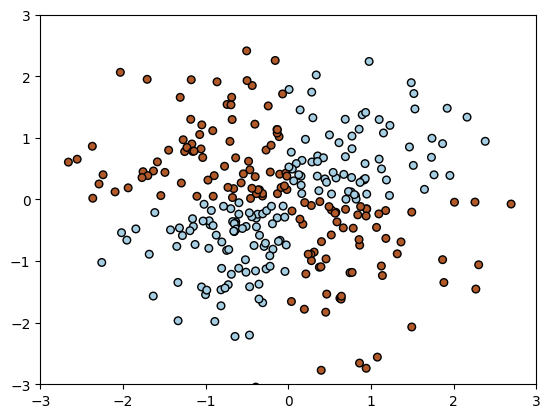

In [35]:
train_X = np.random.randn(300, 2)
train_Y = np.logical_xor(train_X[:, 0] > 0, train_X[:, 1] > 0)

plt.scatter(train_X[:, 0], train_X[:, 1], s=30, c=train_Y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.axis([-3, 3, -3, 3])
plt.show()

- **(a)** Let's first learn SVM with the linear kernel. Please fill in the 2 gaps in the code.

In [36]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    # fit the model here:
    svm_model = svm.SVC(kernel="linear")
    svm_model.fit(train_X,train_Y)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

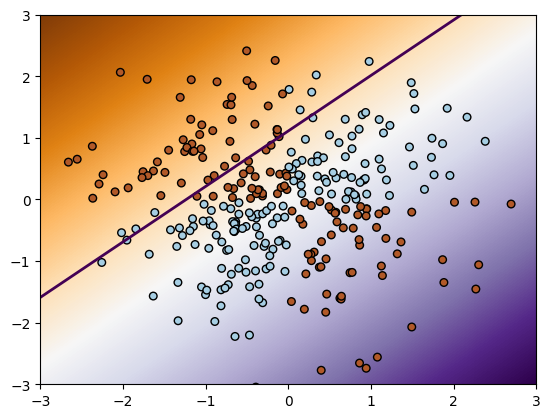

In [37]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))

def plot_svm(model, X, Y, ax = None):
    # plots the decision function for each datapoint on the grid
    
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    if ax is None:
        plt.imshow(Z, interpolation='nearest',
                   extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
                   origin='lower', cmap=plt.cm.PuOr_r)
        contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2)
        plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
                    edgecolors='k')
        plt.axis([-3, 3, -3, 3])
        plt.show()
    else:
        ax.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
        contours = ax.contour(xx, yy, Z, levels=[0], linewidths=2)
        ax.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
                    edgecolors='k')
        ax.axis([-3, 3, -3, 3])

try:
    plot_svm(svm_model, train_X, train_Y)
except Exception as e:
    print("Exception:", e)

- **(b)** Can SVM with the linear kernel separate these data? 

**<font color='purple'>Answer to (b):</font>**
No

- **(c)** Now learn the SVM model with the polynomial kernel of degree 2 and degree 3. Which of them is able to learn the XOR function (not perfectly but reasonably well)?

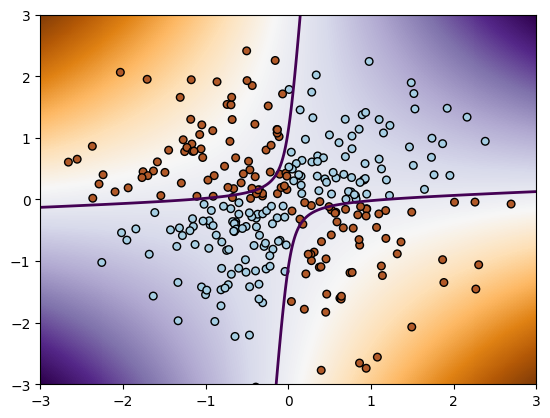

In [38]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    # Degree 2
    svm_poly_2 = svm.SVC(kernel='poly', degree=2)
    svm_poly_2.fit(train_X, train_Y)
    plot_svm(svm_poly_2, train_X, train_Y)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

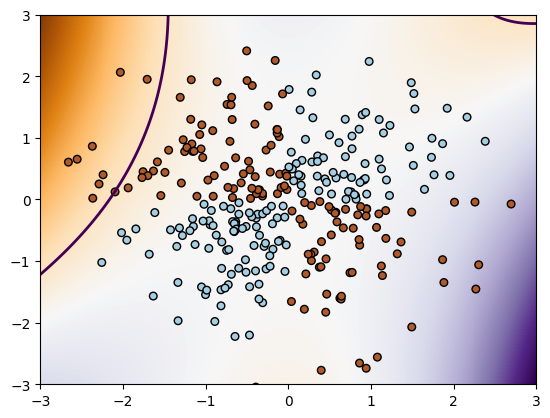

In [39]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    # Degree 3
    svm_poly_3 = svm.SVC(kernel='poly', degree=3)
    svm_poly_3.fit(train_X, train_Y)
    plot_svm(svm_poly_3, train_X, train_Y)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

**<font color='purple'>Answer to (c):</font>**


- **(d)** Let us try to understand the reason why one degree worked well and the other not. Which of the following features is the most useful in discriminating the two classes: $x_1$, $x_2$, $x_1^2$, $x_2^2$, $x_1^3$, $x_2^3$, $x_1 x_2$, $x_1^2 x_2$, $x_2^2 x_1$? (Hint: If you cannot guess the right answer then you could visualize these as a surface, example code for $x_2^2 x_1$ is shown below where lighter colour is a hill and darker is valley)

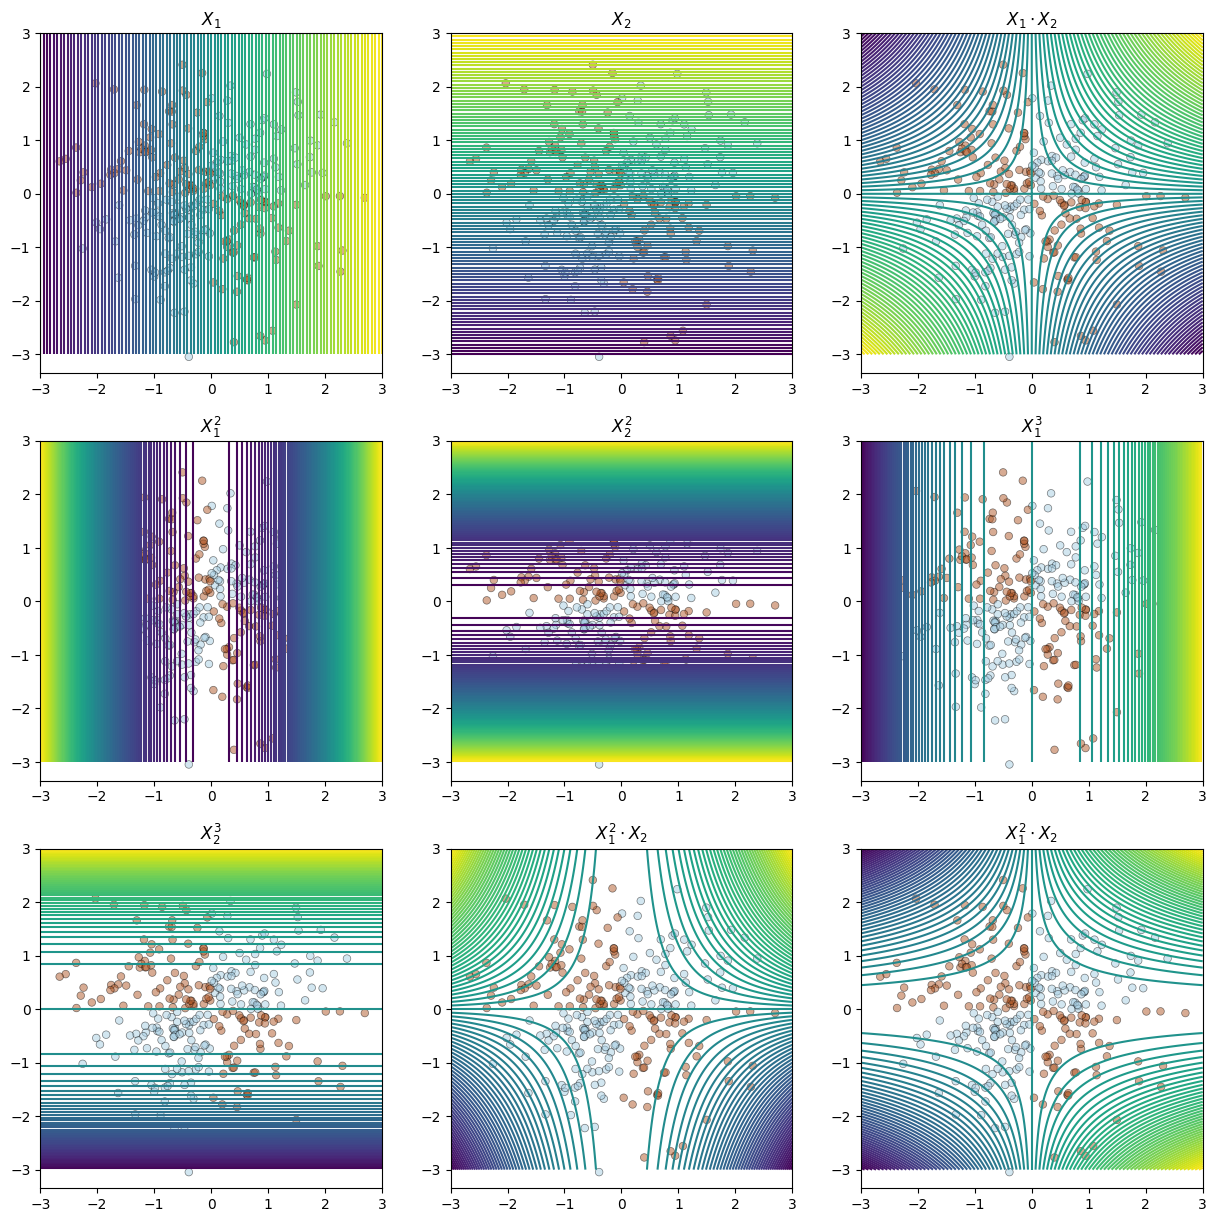

In [44]:
# plt.contour(xx, yy, yy*yy*xx)
# plt.title('X1.X2^2')
# plt.show()
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    features = [
        (xx, r"$X_1$"),
        (yy, r"$X_2$"),
        (xx * yy, r"$X_1 \cdot X_2$"),
        (xx**2, r"$X_1^2$"),
        (yy**2, r"$X_2^2$"),
        (xx**3, r"$X_1^3$"),
        (yy**3, r"$X_2^3$"),
        (xx**2 * yy, r"$X_1^2 \cdot X_2$"),
        (xx * yy**2, r"$X_1^2 \cdot X_2$"),
    ]
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    for i, ax in enumerate(axes.flatten()):
        ax.scatter(
            train_X[:, 0],
            train_X[:, 1],
            s=30,
            c=train_Y,
            cmap=plt.cm.Paired,
            edgecolors="k",
            alpha=0.5,
            linewidths=0.5,
        )
        ax.contour(xx, yy, features[i][0], 100)
        ax.set_title(f"{features[i][1]}")
    plt.show()
    # Visualize rest of the features similarly as above
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

**<font color='purple'>Answer to (d):</font>**
the true discriminating surface is x1 * x2

- **(e)** Expand the expression $\kappa(\mathbf{x},\mathbf{z})=\left(\mathbf{x}\cdot\mathbf{z}\right)^2$ (open the brackets) where $\mathbf{x}=(x_1,x_2)$ and $\mathbf{z}=(z_1,z_2)$. **<font color='purple'>For this please modify the following code for your purpose:</font>** Hint: we did this in the practice session, but you can follow a similar example at page 51 of Lecture 05.

In [49]:
import sympy as sp
sp.init_printing(use_latex='mathjax')

try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    #Example
    x1, x2, z1, z2 = sp.symbols('x1 x2 z1 z2')
    dot_product = (x1 * z1 + x2 * z2) 
    expanded_expression = sp.expand(dot_product**2)
    display(expanded_expression)
    # a, b = sp.symbols('a_1 b_2')
    # sp.expand( (a + b)**2 )
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

  2   2                     2   2
x₁ ⋅z₁  + 2⋅x₁⋅x₂⋅z₁⋅z₂ + x₂ ⋅z₂ 

- **(f)** Please now list all features that are included in the constructed feature space $\phi(\mathbf{x})$ corresponding to the kernel $\kappa(\mathbf{x},\mathbf{z})=(\mathbf{x}\cdot\mathbf{z})^2$. Hint: You can read this out from your answer to **(e)** because $\kappa(\mathbf{x},\mathbf{z})=\phi(\mathbf{x})\cdot\phi(\mathbf{z})$.

**<font color='purple'>Answer to (f):</font>**
$\phi(x)=(x^2, y^2, \sqrt{2}xy)$

- **(g)** Is the best discriminator from subtask **(d)** present among the constructed features as listed in subtask **(f)**? Does this explain why polynomial kernel with degree 2 performed well / not well in subtask **(c)**? 

**<font color='purple'>Answer to (g):</font>** Yes, the best discriminator from subtask (d) is present among the constructed features listed in subtask (f).


- **(h)** Please now expand the expression $\kappa(\mathbf{x},\mathbf{z})=\left(\mathbf{x}\cdot\mathbf{z}\right)^3$ similarly to subtask **(e)** and list the features in the constructed feature space $\phi(\mathbf{x})$ corresponding to this kernel, as in subtask **(f)**. 

In [54]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    ##### YOUR CODE ENDS ##### (please do not delete this line)
    expression = (x1 * z1 + x2 * z2) ** 3
    display(sp.expand(expression))

except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

  3   3       2      2             2      2     3   3
x₁ ⋅z₁  + 3⋅x₁ ⋅x₂⋅z₁ ⋅z₂ + 3⋅x₁⋅x₂ ⋅z₁⋅z₂  + x₂ ⋅z₂ 

**<font color='purple'>Answer to (h):</font>**
$\phi(x)=(...)$

- **(i)** Is the best discriminator from subtask **(d)** present among the constructed features as listed in subtask **(h)**? Does this explain why polynomial kernel with degree 3 performed well / not well in subtask **(c)**? 

**<font color='purple'>Answer to (i):</font>** No


- **(j)** The polynomial kernel is actually defined by $\kappa(\mathbf{x},\mathbf{z}) = (\mathbf{x}\cdot\mathbf{z}+r)^d$, but by default this r is 0. Take $r = 1$ and $d = 3$ and list the features in the constructed feature space $\phi(\mathbf{x})$ corresponding to this kernel. Is the necessary feature present now?

In [55]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    ##### YOUR CODE ENDS ##### (please do not delete this line)
    expression = (x1 * z1 + x2 * z2 + 1) ** 3
    expanded_expression = sp.expand(expression)
    display(expanded_expression)
    
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

  3   3       2      2          2   2          2      2                        ↪
x₁ ⋅z₁  + 3⋅x₁ ⋅x₂⋅z₁ ⋅z₂ + 3⋅x₁ ⋅z₁  + 3⋅x₁⋅x₂ ⋅z₁⋅z₂  + 6⋅x₁⋅x₂⋅z₁⋅z₂ + 3⋅x₁ ↪

↪         3   3       2   2              
↪ ⋅z₁ + x₂ ⋅z₂  + 3⋅x₂ ⋅z₂  + 3⋅x₂⋅z₂ + 1

**<font color='purple'>Answer to (j):</font>**


- **(k)** The value $r$ is represented by parameter 'coef0' in the SVC function. Change it to 1 and see if you can now learn XOR with polynomial kernel of degree 3. Make the resulting plot and report if learning of XOR succeeded.

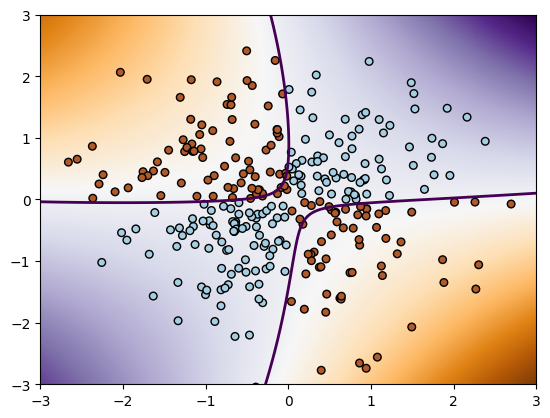

In [56]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    ##### YOUR CODE ENDS ##### (please do not delete this line)
    svm_poly_3_coef1 = svm.SVC(kernel='poly', degree=3, coef0=1)
    svm_poly_3_coef1.fit(train_X, train_Y)
    plot_svm(svm_poly_3_coef1, train_X, train_Y)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

**<font color='purple'>Answer to (k):</font>**


## Task 3: Gaussian kernel in SVM (1 point)

- **(a)** Make __6__ plots and show how RBF kernel works with different C values: 0.1, 0.5, 1, 2, 10, 100. What do you observe? What does parameter C do? 

    - Hint 1: Remember the soft-margin SVM formula and check out what the C parameter stood for. 
    - Hint 2: Use `plt.subplots(2, 3, figsize=...)` to arrange them nicely and `plot_svm(svm_model, train_X, train_Y, ax=ax[i][j])` to plot to the subplot in row i and column j. 
    - Hint 3: Make sure you run `plt.show()` after the plotting.

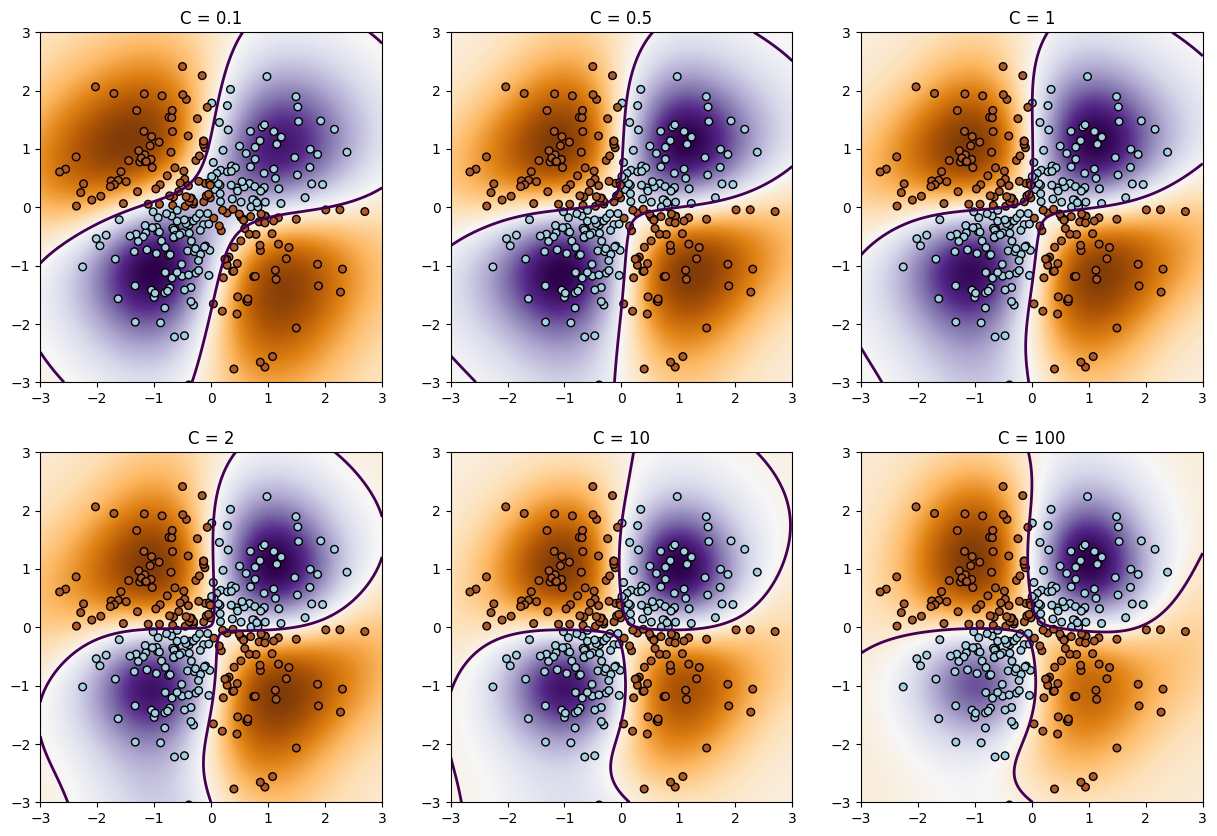

In [58]:
from sklearn.svm import SVC
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    ##### YOUR CODE ENDS ##### (please do not delete this line)
    C_values = [0.1, 0.5, 1, 2, 10, 100]
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    for idx, c in enumerate(C_values):
            svm_rbf = SVC(kernel='rbf', C=c)
            svm_rbf.fit(train_X, train_Y)
            i, j = divmod(idx, 3)
            plot_svm(svm_rbf, train_X, train_Y, ax=axes[i][j])
            axes[i][j].set_title(f'C = {c}')
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

**<font color='purple'>Answer to (a):</font>**
C parameter in SVM controls the trade-off between maximizing the margin and minimizing the classification error
- small C -> softer margins
- large C -> harder margins

- **(b)** Now change the gamma parameter: 0.01, 0.5, 1, 2, 10, 100 and do the same as in the subtask **(a)**. What does the gamma parameter do? (Hint: check out the Gaussian kernel formula and rememeber that $\gamma = \frac{1}{2\sigma}$).

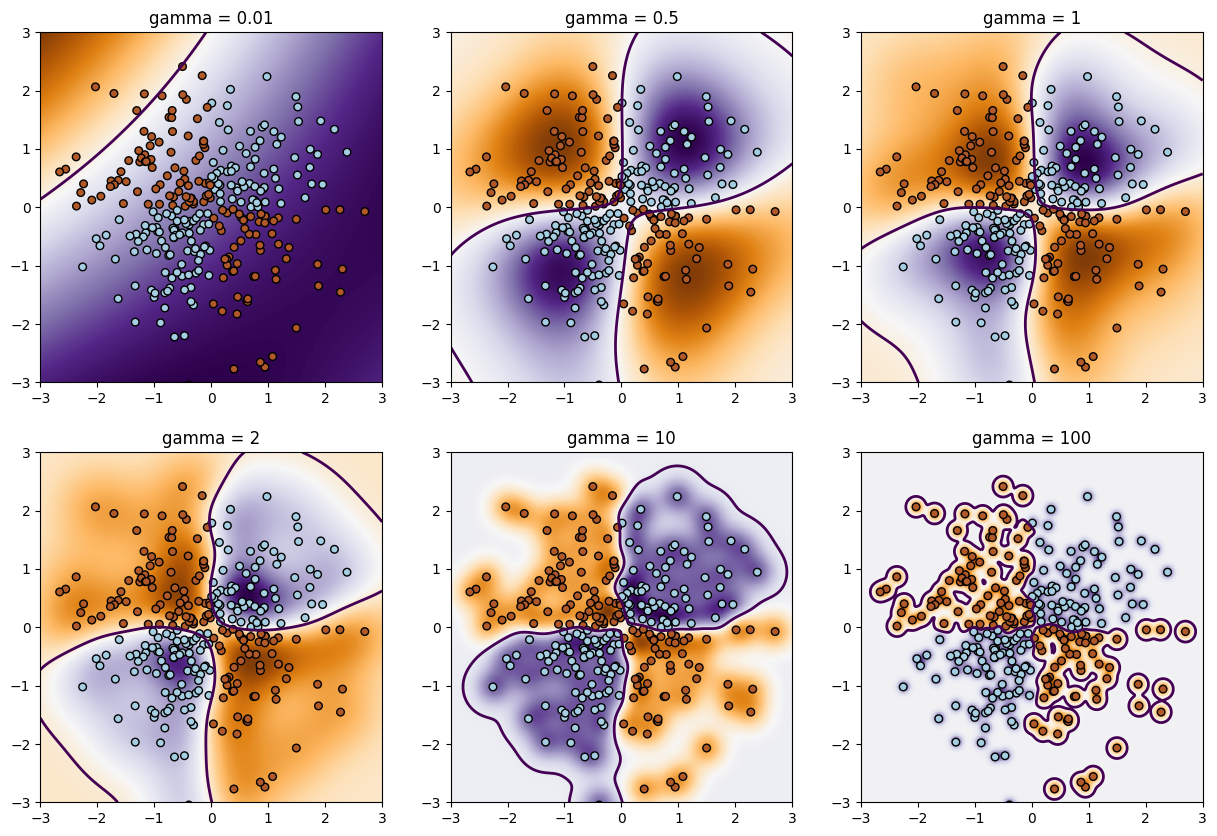

In [59]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    ##### YOUR CODE ENDS ##### (please do not delete this line)
    gamma_values = [0.01, 0.5, 1, 2, 10, 100]
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    for idx, gamma in enumerate(gamma_values):
        svm_rbf = SVC(kernel='rbf', gamma=gamma, C=1)
        svm_rbf.fit(train_X, train_Y)
        i, j = divmod(idx, 3)
        plot_svm(svm_rbf, train_X, train_Y, ax=axes[i][j])
        axes[i][j].set_title(f'gamma = {gamma}')
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

**<font color='purple'>Answer to (b):</font>** gamma make the model have more attention to individual training points.

## Task 4: Decision tree learning (2 points)

The goal of this task is to understand better how the parameter values affect the performance of decision trees. We will do this on the dataset 'adult.data.csv' originating from https://archive.ics.uci.edu/ml/datasets/adult . This data file has been packaged together with the notebook. The following code loads the dataset and prepares it for the task.

**Install graphiz package for decision tree visualization in case it is not installed**
!pip install graphviz

#### In case you still have some issues with graphviz package:
**For Windows Users**: You can download graphviz from [<a href = "https://graphviz.gitlab.io/_pages/Download/Download_windows.html">HERE</a>] Then add it to the system path using the following commands. <br>
```
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'```

**For Ubuntu Linux Users:** try to use the following command to install graphviz
```sudo apt-get install graphviz```

**For MAC Users:** Use the following package
```brew install graphviz```

In [60]:
np.random.seed(0)
data = pd.read_csv("adult.data.csv", dtype="category", header = None, index_col = None, na_values=["NA", " ?", ""])
data.columns = ["age", "workclass", "not_needed1", "education1", "education", "marital_status",
               "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
               "hours_per_week", "country", "income"]
data.dropna(inplace = True)
data["age"] = pd.to_numeric(data["age"])
data["education"] = pd.to_numeric(data["education"])
data["capital_gain"] = pd.to_numeric(data["capital_gain"])
data["capital_loss"] = pd.to_numeric(data["capital_loss"])
data["hours_per_week"] = pd.to_numeric(data["hours_per_week"])
data["capital_gain"] = data["capital_gain"] - data["capital_loss"]
data["income"] = data.income.str.strip()
data.drop(["not_needed1", "education1", "relationship", "capital_gain", "capital_loss",
          "country"], axis = 1, inplace = True)
a = data[data.income == ">50K"].index
b = data[data.income == "<=50K"].index
b = np.random.choice(b, size = len(a), replace = False)
data = data.loc[np.concatenate([a, b])]

In [61]:
data.head()

age          workclass  education       marital_status        occupation  \
7    52   Self-emp-not-inc          9   Married-civ-spouse   Exec-managerial   
8    31            Private         14        Never-married    Prof-specialty   
9    42            Private         13   Married-civ-spouse   Exec-managerial   
10   37            Private         10   Married-civ-spouse   Exec-managerial   
11   30          State-gov         13   Married-civ-spouse    Prof-specialty   

                   race      sex  hours_per_week income  
7                 White     Male              45   >50K  
8                 White   Female              50   >50K  
9                 White     Male              40   >50K  
10                Black     Male              80   >50K  
11   Asian-Pac-Islander     Male              40   >50K

The decision tree implementation in sklearn requires all features to be numeric. We will therefore create a new binary feature for each value of each textual variable.

In [62]:
data = pd.get_dummies(data, columns = ["workclass", "marital_status", "occupation", "race", "sex"])
data.head()

age  education  hours_per_week income  workclass_ Federal-gov  \
7    52          9              45   >50K                   False   
8    31         14              50   >50K                   False   
9    42         13              40   >50K                   False   
10   37         10              80   >50K                   False   
11   30         13              40   >50K                   False   

    workclass_ Local-gov  workclass_ Never-worked  workclass_ Private  \
7                  False                    False               False   
8                  False                    False                True   
9                  False                    False                True   
10                 False                    False                True   
11                 False                    False               False   

    workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  ...  \
7                     False                         True  ...   
8                     False                        False  ...   
9                     False                        False  ...   
10                    False                        False  ...   
11                    False                        False  ...   

    occupation_ Sales  occupation_ Tech-support  occupation_ Transport-moving  \
7               False                     False                         False   
8               False                     False                         False   
9               False                     False                         False   
10              False                     False                         False   
11              False                     False                         False   

    race_ Amer-Indian-Eskimo  race_ Asian-Pac-Islander  race_ Black  \
7                      False                     False        False   
8                      False                     False        False   
9                      False                     False        False   
10                     False                     False         True   
11                     False                      True        False   

    race_ Other  race_ White  sex_ Female  sex_ Male  
7         False         True        False       True  
8         False         True         True      False  
9         False         True        False       True  
10        False        False        False       True  
11        False        False        False       True  

[5 rows x 40 columns]

We will consider the binary classification task of predicting income:

In [63]:
data.income.value_counts()

income
>50K     7508
<=50K    7508
Name: count, dtype: int64

In [64]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(["income"], axis = 1),
                                                    data["income"], test_size = 0.5, random_state = 0)

- **(a)** First build a decision tree of maximum depth 2, calculate train and test accuracies.

In [65]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    # fit the model here:
    dt = DecisionTreeClassifier(max_depth=2, random_state=0)
    dt.fit(X_train, y_train)
    
    y_train_pred = dt.predict(X_train)
    y_test_pred = dt.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Train accuracy: {train_accuracy}, Test accuracy: {test_accuracy}")
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

Train accuracy: 0.7559936068193926, Test accuracy: 0.7566595631326585


**<font color='purple'>Answer to (a):</font>**


- **(b)** Plot the tree using the following code. Interpret the tree by verbally explaining what decisions it makes on different feature values.

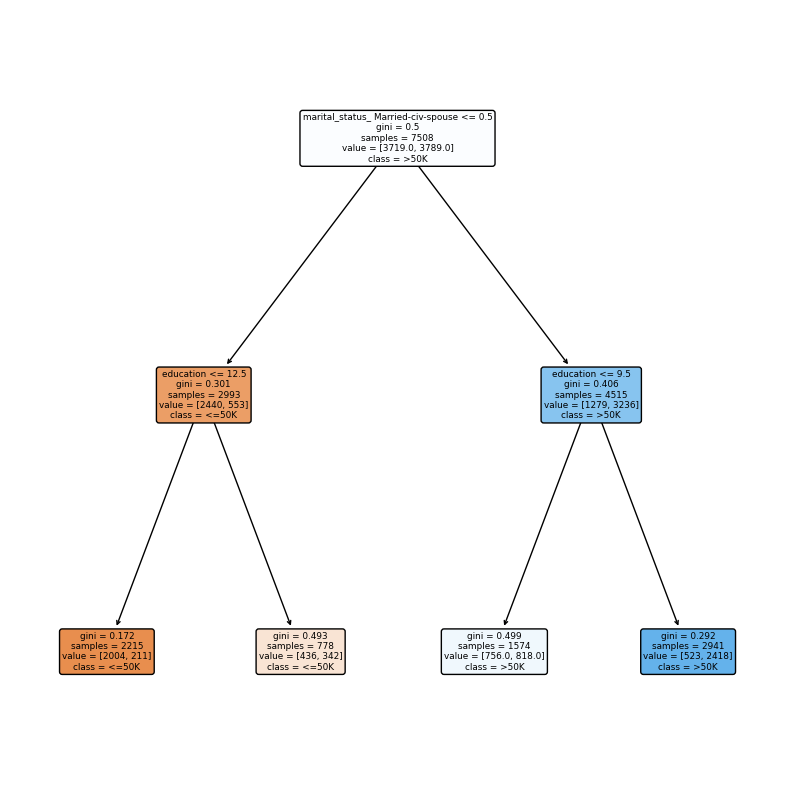

In [73]:
try:
    # dot_data = tree.export_graphviz(dt, out_file=None,
    #                                 feature_names=X_train.columns,
    #                                 class_names=["<=50K", ">50K"],
    #                                 filled=True, rounded=True,
    #                                 special_characters=False)
    # graph = graphviz.Source(dot_data)
    # graph
    plt.figure(figsize=(10, 10))
    tree.plot_tree(
        dt,
        feature_names=X_train.columns,
        class_names=["<=50K", ">50K"],
        filled=True,
        rounded=True,
    )
except Exception as e:
    print("Exception:", e)

**<font color='purple'>Answer to (b):</font>**
- The model first decides based on marital status. This feature is very important in model.

- Then, education level is considered. The tree splits individuals based on different education thresholds (12.5 and 9.5)

**(c)** Explain how decision tree deals with:

1. binary features
2. categorical features
3. continuous features

by describing what all possible splits are that the learning algorithm considers in case of these three types.

**<font color='purple'>Answer to (c):</font>**
- Binary Features: One split separating the two possible values.
- Categorical Features: The tree considers all possible groups of the categories.
- Continuous Features: The tree evaluates various threshold values to split the feature and find the best threshold.

- **(d)** Next, build a tree with the default parameters and calculate the train and test accuracy. Is the model good? Why/why not? Explain what are the default parameters used in sklearn for decision tree and how they influence this kind of result?

In [77]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    ##### YOUR CODE ENDS ##### (please do not delete this line)
    default_tree = DecisionTreeClassifier(random_state=0)

# Fit the decision tree on the training data
    default_tree.fit(X_train, y_train)

    # Predict on both train and test sets
    y_train_pred_default = default_tree.predict(X_train)
    y_test_pred_default = default_tree.predict(X_test)

    # Calculate train and test accuracies
    train_accuracy_default = accuracy_score(y_train, y_train_pred_default)
    test_accuracy_default = accuracy_score(y_test, y_test_pred_default)
    print(train_accuracy_default,test_accuracy_default)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)  
except Exception as e:
    print("Exception:", e)

0.9790889717634523 0.7361481086840703


**<font color='purple'>Answer to (d):</font>**


- **(e)** Modify the learning algorithm to get rid of the problem you had in the previous step. Try to change at least 3 parameters (first one at a time, then all together, try different combinations). Report the three parameters you experimented with and explain how they can be used to improve the tree (what do they do?). Which values did you try and what gave the best results? Build the final tree (don't show the experimenting code) and report train and test accuracies. You should achieve test accuracy > 79% without too much overfitting (meaning that training accuracy should be quite similar).

**<font color='purple'>Answer to (e):</font>**


- **(f)** Now build a tree with max_depth = 7 and visualize it. Explain how to classify the first testing instance X_test.iloc[0] by visually exploring the tree (list all the nodes visited along the path through the tree until the decision). Is the decision the same as the true label? Does the decision path make sense?

In [78]:
from sklearn.model_selection import GridSearchCV

try:

    ##### YOUR CODE STARTS ##### (please do not delete this line)

    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")

    ##### YOUR CODE ENDS ##### (please do not delete this line)
    param_grid = {
        "max_depth": [3, 5, 7],
        "min_samples_split": [10, 20, 50],
        "min_samples_leaf": [5, 10, 20],
    }
    tree_clf = DecisionTreeClassifier(random_state=0)
    grid_search = GridSearchCV(estimator=tree_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    y_test_pred_best = grid_search.best_estimator_.predict(X_test)
    test_accuracy_best = accuracy_score(y_test, y_test_pred_best)
    print(best_params, best_score, test_accuracy_best)
except NotImplementedError as e:

    print(CRED, "TODO:", e, CEND)

except Exception as e:

    print("Exception:", e)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
{'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 50} 0.8056746900202351 0.8015450186467767


**<font color='purple'>Answer to (f):</font>**


- **(g)** What seem to be the most important features? Check out the feature importances given by the sklearn model from **(f)**. Do they agree with your guess? How are these feature importances calculated? Hint: feature importances are given by `dt.feature_importances_`

In [90]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    ##### YOUR CODE ENDS ##### (please do not delete this line)
    best_tree = grid_search.best_estimator_
    feature_importances = best_tree.feature_importances_
    # print(feature_importances)
    feature_importance_df = pd.DataFrame(
        {"Feature": X_train.columns, "Importance": feature_importances}
    ).sort_values(by="Importance", ascending=False)
    display(feature_importance_df)
except NotImplementedError as e:
    print(CRED, "TODO:", e, CEND)
except Exception as e:
    print("Exception:", e)

Feature  Importance
13     marital_status_ Married-civ-spouse    0.595269
1                               education    0.254652
0                                     age    0.094577
2                          hours_per_week    0.042944
25              occupation_ Other-service    0.004828
37                            sex_ Female    0.003807
27             occupation_ Prof-specialty    0.002171
6                      workclass_ Private    0.001380
11               marital_status_ Divorced    0.000331
38                              sex_ Male    0.000042
10                 workclass_ Without-pay    0.000000
5                 workclass_ Never-worked    0.000000
3                  workclass_ Federal-gov    0.000000
36                            race_ White    0.000000
35                            race_ Other    0.000000
34                            race_ Black    0.000000
33               race_ Asian-Pac-Islander    0.000000
32               race_ Amer-Indian-Eskimo    0.000000
31           occupation_ Transport-moving    0.000000
30               occupation_ Tech-support    0.000000
29                      occupation_ Sales    0.000000
28            occupation_ Protective-serv    0.000000
4                    workclass_ Local-gov    0.000000
26            occupation_ Priv-house-serv    0.000000
24          occupation_ Machine-op-inspct    0.000000
9                    workclass_ State-gov    0.000000
23          occupation_ Handlers-cleaners    0.000000
22            occupation_ Farming-fishing    0.000000
21            occupation_ Exec-managerial    0.000000
20               occupation_ Craft-repair    0.000000
7                 workclass_ Self-emp-inc    0.000000
18               occupation_ Adm-clerical    0.000000
17                marital_status_ Widowed    0.000000
16              marital_status_ Separated    0.000000
15          marital_status_ Never-married    0.000000
14  marital_status_ Married-spouse-absent    0.000000
8             workclass_ Self-emp-not-inc    0.000000
12      marital_status_ Married-AF-spouse    0.000000
19               occupation_ Armed-Forces    0.000000

**<font color='purple'>Answer to (g):</font>**


 ## <font color='red'>This was the last task! Please restart and run all before submission!</font>